Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


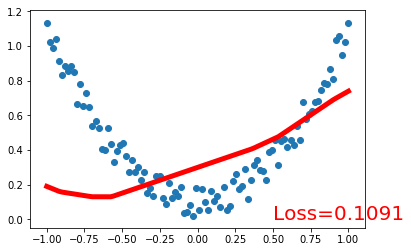

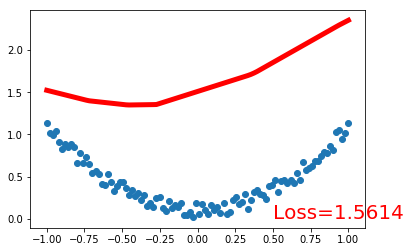

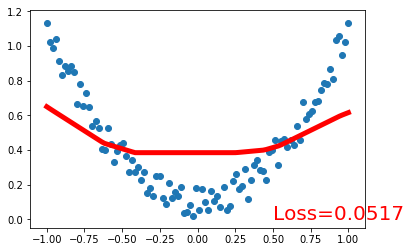

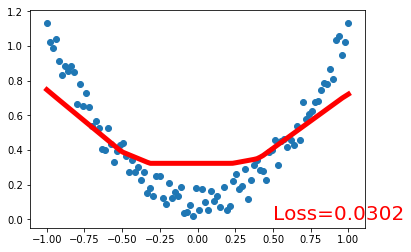

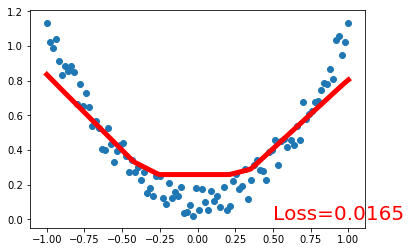

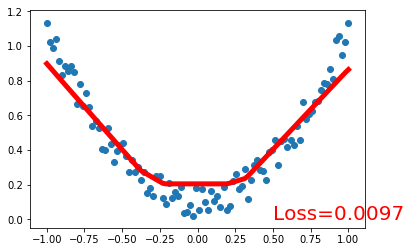

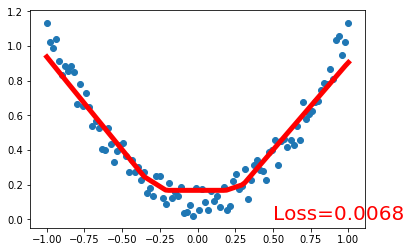

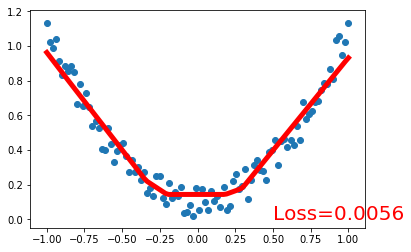

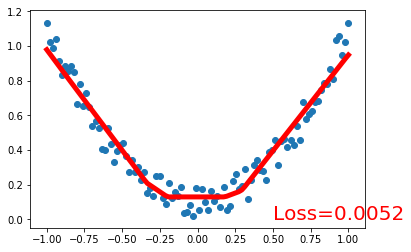

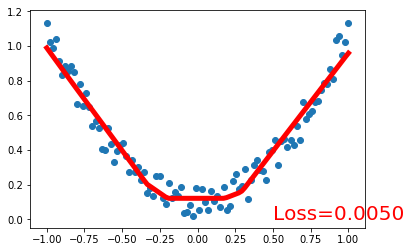

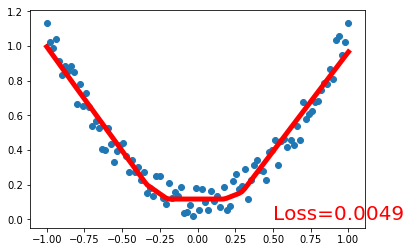

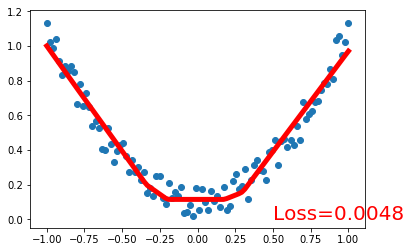

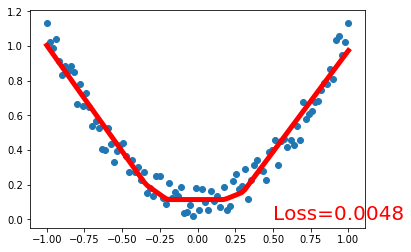

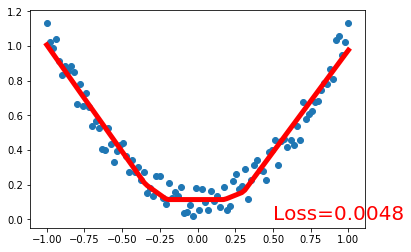

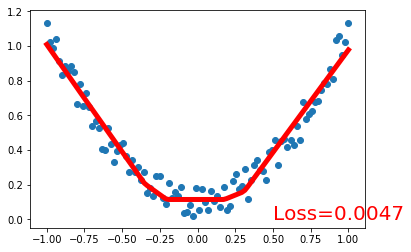

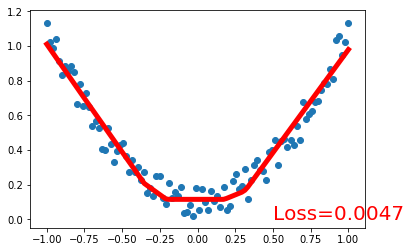

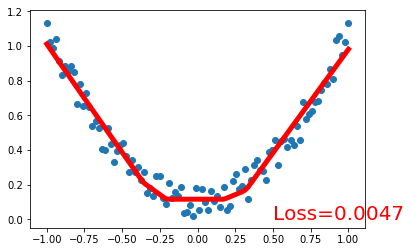

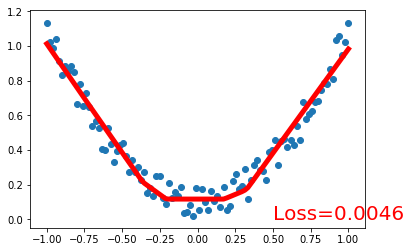

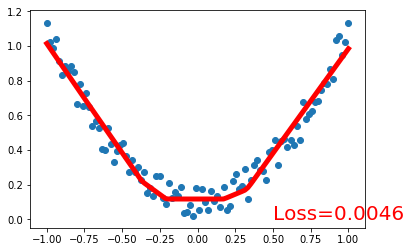

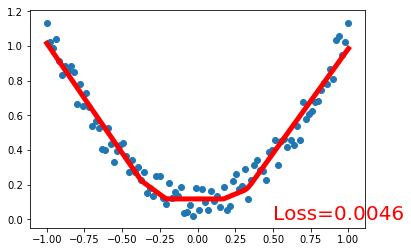

In [3]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)#
y = x.pow(2) + 0.2*torch.rand(x.size())

# plt.scatter(x.data.numpy(),y.data.numpy())
# plt.show()

class Net(torch.nn.Module):
    
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(n_feature,n_hidden)
        self.predict = torch.nn.Linear(n_hidden,n_output)
        
    def forward(self,x):#输入信息
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x
    
net = Net(1,10,1)
print(net)

plt.ion() #plt变成实时打印的过程
plt.show()


optimizer = torch.optim.SGD(net.parameters(),lr=0.5)
loss_func = torch.nn.MSELoss()#均方差 预测值和真实值的误差计算公式 (均方差)

for t in range(100):
    prediction = net(x)
    
    loss = loss_func(prediction,y)
    
    optimizer.zero_grad()#梯度设为0
    loss.backward()#反向传播 计算梯度
    optimizer.step()#优化梯度 将参数更新值施加到 net 的 parameters 上
    if t%5 == 0:
        #plt and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(),y.data.numpy())
        plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=5)
        #plt.text(0.5,0,'Loss=%.4f',loss.data[0],fontdict={'size':20,'color':'red'})
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(0.1)
plt.ioff()